# Final Project PMA: Forecasting Total Pengunjung dengan Metode SVR

```
Disusun Oleh
Nadila Nur Sholekah (5026211041)
Fathia Rahmanisa D (5026211067)
PMA (C)

```

#Import Library

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from tabulate import tabulate

#Import Dataset

In [ ]:
jkt = pd.read_csv('https://raw.githubusercontent.com/NadilaNurSholekah/kel17pmac/main/Jakarta%202015%20-%202022.csv')
jkt

,datetime,total_visitor,total_accomodation
0,1/1/2014,193017,16332
1,2/1/2014,185851,17101
2,3/1/2014,204004,17438
3,4/1/2014,186373,17943
4,5/1/2014,190716,18123
...,...,...,...
103,8/1/2022,121438,68569
104,9/1/2022,111139,69382
105,10/1/2022,112588,69626
106,11/1/2022,113958,69843


#Preprocessing

## Cek Missing Value

In [ ]:
#cek nilai null
jkt.isna().sum()

datetime              0
total_visitor         0
total_accomodation    0
dtype: int64

Setelah ini, kita akan menentukan panjang data sehingga kita dapat membagi data untuk beberapa sekanario pemodelan di metode GRU

In [ ]:
len(jkt)

108

##Index Datetime

In [ ]:
jkt_original = jkt.copy()
train_datetime = pd.to_datetime(jkt['datetime'])
jkt = jkt.set_index("datetime")
jkt.head(10)

,total_visitor,total_accomodation
datetime,,
1/1/2014,193017,16332
2/1/2014,185851,17101
3/1/2014,204004,17438
4/1/2014,186373,17943
5/1/2014,190716,18123
6/1/2014,213950,18293
7/1/2014,173914,18592
8/1/2014,224492,18872
9/1/2014,179723,19102


In [ ]:
input_col = list(jkt)[0:3]
print(input_col)

['total_visitor', 'total_accomodation']


In [ ]:
data_for_pred = jkt[input_col]

In [ ]:
scaler = StandardScaler()
scaled_data_pred = pd.DataFrame(scaler.fit_transform(jkt), columns=jkt.columns)

Diketahui bahwa panjang data keseluruhan adalah 108 baris data. Dalam pengerjaan tugas ini terdapat 3 skenario pembagian data training dan testing, yaitu sebagai berikut:

- Skenario 1: 80% training (86) dan 20% testing (22)
- Skenario 2: 70% training (76) dan 30% testng (33)
- Skenario 3: 60% training (65) dan 40% testing (43)


#SVR

##Skenario 1

80% training (86) dan 20% testing (22)

In [ ]:
#Assigned variable for training and testing
X = scaled_data_pred.iloc[:,1].values
y = scaled_data_pred.iloc[:,0].values

In [ ]:
X=X.reshape(-1,1)
y=y.reshape(-1,1)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Display results
lengths_80 = {
    'X_train': len(X_train),
    'y_train': len(y_train),
    'X_test': len(X_test),
    'y_test': len(y_test)
}

# Convert lengths to a Pandas DataFrame
lengths_80_df = pd.DataFrame.from_dict(lengths_80, orient='index', columns=['Length'])

print(lengths_80_df)


         Length
X_train      86
y_train      86
X_test       22
y_test       22


In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 1,],
    'kernel': ['linear', 'rbf']
}

In [ ]:
# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=SVR(), param_grid=param_grid, refit=True, verbose=2, cv=2)

In [ ]:
# Fit model with the best parameters
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV] END ................C=0.01, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ................C=0.01, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, epsilon=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.01, epsilon=0.01, kernel=rbf; total time=   0.0s
[CV] END .................C=0.01, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.01, epsilon=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, epsilon=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.01, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.01, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, epsilon=1

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=2, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1], 'epsilon': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}


In [ ]:
n_past = 1
n_month_for_prediction=12
predict_period_month = pd.date_range(list(train_datetime)[-n_past], periods=n_month_for_prediction, freq='M').tolist()
print(predict_period_month)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [ ]:
# Make predictions with the best parameter
best_regressor = grid_search.best_estimator_
predictions = best_regressor.predict(X_test[-n_month_for_prediction:])

In [ ]:
y_test = y_test[-n_month_for_prediction:]

In [ ]:
y_pred = predictions.reshape(-1,1)
prediction_copies = np.repeat(y_pred, jkt.shape[1], axis=-1)
y_pred1 = scaler.inverse_transform(prediction_copies)[:,0]

In [ ]:
y_test = np.repeat(y_test, jkt.shape[1], axis=-1)
y_test = scaler.inverse_transform(y_test)[:,0]

In [ ]:
# Calculate evaluation metrics
mae1 = mean_absolute_error(y_test[-n_month_for_prediction:], predictions)
mse1 = mean_squared_error(y_test[-n_month_for_prediction:], predictions)
mape1 = mean_absolute_percentage_error(y_test[-n_month_for_prediction:], predictions)

print("Mean Absolute Error (MAE):", mae1)
print("Mean Squared Error (MSE):", mse1)
print("Mean Absolute Percentage Error (MAPE):", mape1)

Mean Absolute Error (MAE): 133617.66869841592
Mean Squared Error (MSE): 27574489304.269207
Mean Absolute Percentage Error (MAPE): 1.0002339975254366


<ipython-input-23-4bb761a1cee8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual['datetime'] = pd.to_datetime(actual['datetime'])


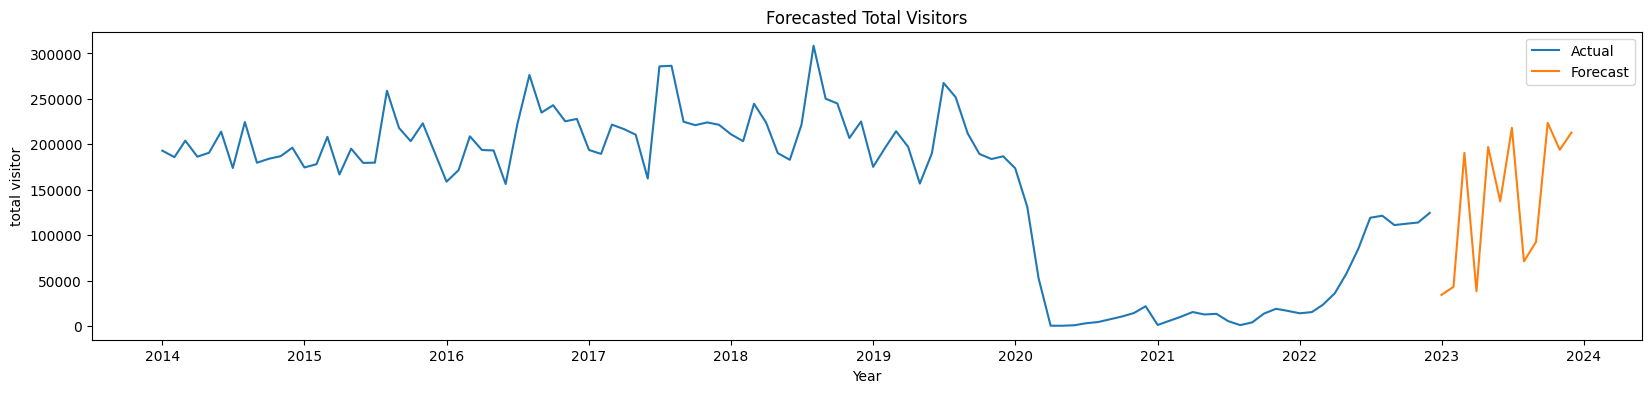

╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │        34324 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │        43183 │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │       190533 │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │        38317 │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │       197085 │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │       137257 │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │       218123 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │        71237 │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │        92630 │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │       223616 │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │       194002 │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  

In [ ]:
forecast_dates = []

for time_i in predict_period_month:
    forecast_dates.append(time_i.date())

df_forecast = pd.DataFrame({'Date': forecast_dates, 'total_visitor': y_pred1})
df_forecast['date'] = pd.to_datetime(df_forecast['Date'])

# Assuming 'actual' contains the original data with 'datetime' and 'total_visitor' columns
plt.figure(figsize=(20,4))
actual = jkt_original[['datetime', 'total_visitor']]
actual['datetime'] = pd.to_datetime(actual['datetime'])
actual = actual.loc[actual['datetime'] >= '2014-01-01']

sns.lineplot(data=actual, x='datetime', y='total_visitor', label='Actual')
sns.lineplot(data=df_forecast, x='date', y='total_visitor', label='Forecast')

plt.xlabel('Year')
plt.ylabel('total visitor')
plt.title('Forecasted Total Visitors')
plt.legend()
plt.show()

# Generate the forecast dates from January 2023 to December 2023
forecast_dates_1 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')


# Create a list of forecast dates and prediction values
data = list(zip(forecast_dates_1, map(int, y_pred1)))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table = tabulate(data, headers=headers, tablefmt='fancy_grid')
# Print the table
print(table)

##Skenario 2

70% training (75) dan 30% testng (33)

In [ ]:
#Assigned variable for training and testing
X = scaled_data_pred.iloc[:,1].values
y = scaled_data_pred.iloc[:,0].values

In [ ]:
X=X.reshape(-1,1)
y=y.reshape(-1,1)

In [ ]:
# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
# Display results
lengths_70 = {
    'X_train 2': len(X_train2),
    'y_train 2': len(y_train2),
    'X_test 2': len(X_test2),
    'y_test 2': len(y_test2)
}

# Convert lengths to a Pandas DataFrame
lengths_70_df = pd.DataFrame.from_dict(lengths_70, orient='index', columns=['Length'])

print(lengths_70_df)


           Length
X_train 2      75
y_train 2      75
X_test 2       33
y_test 2       33


In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 1,],
    'kernel': ['linear', 'rbf']
}

In [ ]:
# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=SVR(), param_grid=param_grid, refit=True, verbose=2, cv=2)

In [ ]:
# Fit model with the best parameters
grid_search.fit(X_train2, y_train2)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV] END ................C=0.01, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ................C=0.01, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, epsilon=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.01, epsilon=0.01, kernel=rbf; total time=   0.0s
[CV] END .................C=0.01, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.01, epsilon=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, epsilon=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.01, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.01, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, epsilon=1

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=2, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1], 'epsilon': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}


In [ ]:
n_past = 1
n_month_for_prediction=12
predict_period_month = pd.date_range(list(train_datetime)[-n_past], periods=n_month_for_prediction, freq='M').tolist()
print(predict_period_month)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [ ]:
# Make predictions with the best parameter
best_regressor = grid_search.best_estimator_
predictions2 = best_regressor.predict(X_test2[-n_month_for_prediction:])

In [ ]:
y_test2 = y_test2[-n_month_for_prediction:]

In [ ]:
y_pred = predictions2.reshape(-1,1)
predictions2_copies = np.repeat(y_pred, jkt.shape[1], axis=-1)
y_pred2 = scaler.inverse_transform(predictions2_copies)[:,0]

In [ ]:
y_test2 = np.repeat(y_test2, jkt.shape[1], axis=-1)
y_test2 = scaler.inverse_transform(y_test2)[:,0]

In [ ]:
# Print the error metrics
#predictions2 = best_regressor.predict(X_test2[-n_month_for_prediction:])

# Calculate evaluation metrics
mae2 = mean_absolute_error(y_test2[-n_month_for_prediction:], predictions2)
mse2 = mean_squared_error(y_test2[-n_month_for_prediction:], predictions2)
mape2 = mean_absolute_percentage_error(y_test2[-n_month_for_prediction:], predictions2)

print("Mean Absolute Error (MAE):", mae2)
print("Mean Squared Error (MSE):", mse2)
print("Mean Absolute Percentage Error (MAPE):", mape2)

Mean Absolute Error (MAE): 161666.82068031395
Mean Squared Error (MSE): 33067813455.445316
Mean Absolute Percentage Error (MAPE): 1.0000196466562374


<ipython-input-38-53a4bab22808>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual['datetime'] = pd.to_datetime(actual['datetime'])


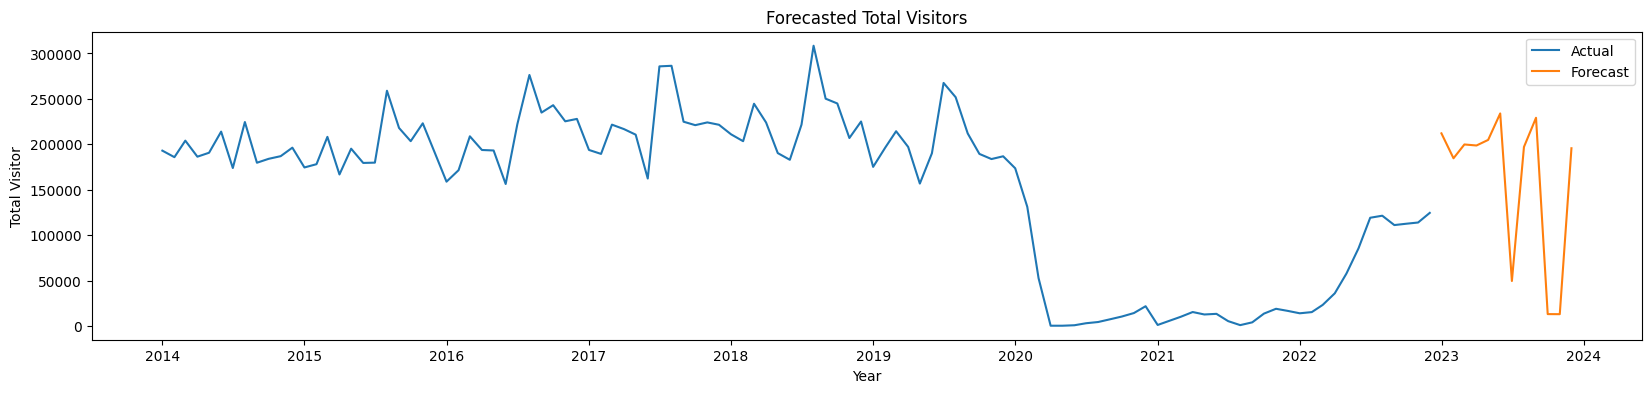

╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │        34324 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │        43183 │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │       190533 │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │        38317 │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │       197085 │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │       137257 │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │       218123 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │        71237 │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │        92630 │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │       223616 │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │       194002 │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  

In [ ]:
forecast_dates = []

for time_i in predict_period_month:
    forecast_dates.append(time_i.date())

df_forecast2 = pd.DataFrame({'Date': forecast_dates, 'Total Visitor': y_pred2})
df_forecast2['date'] = pd.to_datetime(df_forecast2['Date'])

# Assuming 'actual' contains the original data with 'datetime' and 'total_visitor' columns
plt.figure(figsize=(20,4))
actual = jkt_original[['datetime', 'total_visitor']]
actual['datetime'] = pd.to_datetime(actual['datetime'])
actual = actual.loc[actual['datetime'] >= '2014-01-01']

sns.lineplot(data=actual, x='datetime', y='total_visitor', label='Actual')
sns.lineplot(data=df_forecast2, x='date', y='Total Visitor', label='Forecast')

plt.xlabel('Year')
plt.ylabel('Total Visitor')
plt.title('Forecasted Total Visitors')
plt.legend()
plt.show()

# Generate the forecast dates from January 2023 to December 2023
forecast_dates_1 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')


# Create a list of forecast dates and prediction values
data = list(zip(forecast_dates_1, map(int, y_pred1)))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table = tabulate(data, headers=headers, tablefmt='fancy_grid')
# Print the table
print(table)

##Skenario 3

60% training (64) dan 40% testing (44)

In [ ]:
#Assigned variable for training and testing
X = scaled_data_pred.iloc[:,1].values
y = scaled_data_pred.iloc[:,0].values

In [ ]:
X=X.reshape(-1,1)
y=y.reshape(-1,1)

In [ ]:
# Split the data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [ ]:
# Display results
lengths_60 = {
    'X_train 3': len(X_train3),
    'y_train 3': len(y_train3),
    'X_test 3': len(X_test3),
    'y_test 3': len(y_test3)
}

# Convert lengths to a Pandas DataFrame
lengths_60_df = pd.DataFrame.from_dict(lengths_60, orient='index', columns=['Length'])

print(lengths_60_df)


           Length
X_train 3      64
y_train 3      64
X_test 3       44
y_test 3       44


In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 1,],
    'kernel': ['linear', 'rbf']
}

In [ ]:
# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=SVR(), param_grid=param_grid, refit=True, verbose=2, cv=2)

In [ ]:
# Fit model with the best parameters
grid_search.fit(X_train3, y_train3)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV] END ................C=0.01, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ................C=0.01, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, epsilon=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.01, epsilon=0.01, kernel=rbf; total time=   0.0s
[CV] END .................C=0.01, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.01, epsilon=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, epsilon=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.01, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.01, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, epsilon=1

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=2, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1], 'epsilon': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}


In [ ]:
n_past = 1
n_month_for_prediction=12
predict_period_month = pd.date_range(list(train_datetime)[-n_past], periods=n_month_for_prediction, freq='M').tolist()
print(predict_period_month)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [ ]:
# Make predictions with the best parameter
best_regressor = grid_search.best_estimator_
y_pred = best_regressor.predict(X_test[-n_month_for_prediction:])

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 1,],
    'kernel': ['linear', 'rbf']
}

In [ ]:
# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=SVR(), param_grid=param_grid, refit=True, verbose=2, cv=2)

In [ ]:
# Fit model with the best parameters
grid_search.fit(X_train3, y_train3)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV] END ................C=0.01, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ................C=0.01, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, epsilon=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.01, epsilon=0.01, kernel=rbf; total time=   0.0s
[CV] END .................C=0.01, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.01, epsilon=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, epsilon=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.01, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.01, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, epsilon=1

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=2, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1], 'epsilon': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}


In [ ]:
n_past = 1
n_month_for_prediction=12
predict_period_month = pd.date_range(list(train_datetime)[-n_past], periods=n_month_for_prediction, freq='M').tolist()
print(predict_period_month)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [ ]:
# Make predictions with the best parameter
best_regressor = grid_search.best_estimator_
y_pred = best_regressor.predict(X_test[-n_month_for_prediction:])

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 1,],
    'kernel': ['linear', 'rbf']
}

In [ ]:
# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=SVR(), param_grid=param_grid, refit=True, verbose=2, cv=2)

In [ ]:
# Fit model with the best parameters
grid_search.fit(X_train3, y_train3)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV] END ................C=0.01, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ................C=0.01, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, epsilon=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.01, epsilon=0.01, kernel=rbf; total time=   0.0s
[CV] END .................C=0.01, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.01, epsilon=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, epsilon=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.01, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.01, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, epsilon=1

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=2, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1], 'epsilon': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}


In [ ]:
n_past = 1
n_month_for_prediction=12
predict_period_month = pd.date_range(list(train_datetime)[-n_past], periods=n_month_for_prediction, freq='M').tolist()
print(predict_period_month)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [ ]:
# Make predictions with the best parameter
best_regressor = grid_search.best_estimator_
predictions3 = best_regressor.predict(X_train3[-n_month_for_prediction:])

In [ ]:
y_test3 = y_test3[-n_month_for_prediction:]

In [ ]:
y_pred=predictions3.reshape(-1,1)
prediction3_copies = np.repeat(y_pred, jkt.shape[1], axis=-1)
y_pred3 = scaler.inverse_transform(prediction3_copies)[:,0]

In [ ]:
y_test3 = np.repeat(y_test3, jkt.shape[1], axis=-1)
y_test3 = scaler.inverse_transform(y_test3)[:,0]

In [ ]:
# Print the error metrics
#predictions3 = best_regressor.predict(X_train3[-n_month_for_prediction:])
# Calculate evaluation metrics
mae3 = mean_absolute_error(y_test3[-n_month_for_prediction:], predictions3)
mse3 = mean_squared_error(y_test3[-n_month_for_prediction:], predictions3)
mape3 = mean_absolute_percentage_error(y_test3[-n_month_for_prediction:], predictions3)

print("Mean Absolute Error (MAE):", mae3)
print("Mean Squared Error (MSE):", mse3)
print("Mean Absolute Percentage Error (MAPE):", mape3)


Mean Absolute Error (MAE): 201831.35070706718
Mean Squared Error (MSE): 43020580140.55543
Mean Absolute Percentage Error (MAPE): 1.000003228586285


<ipython-input-65-4bc11a6be8de>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual['datetime'] = pd.to_datetime(actual['datetime'])


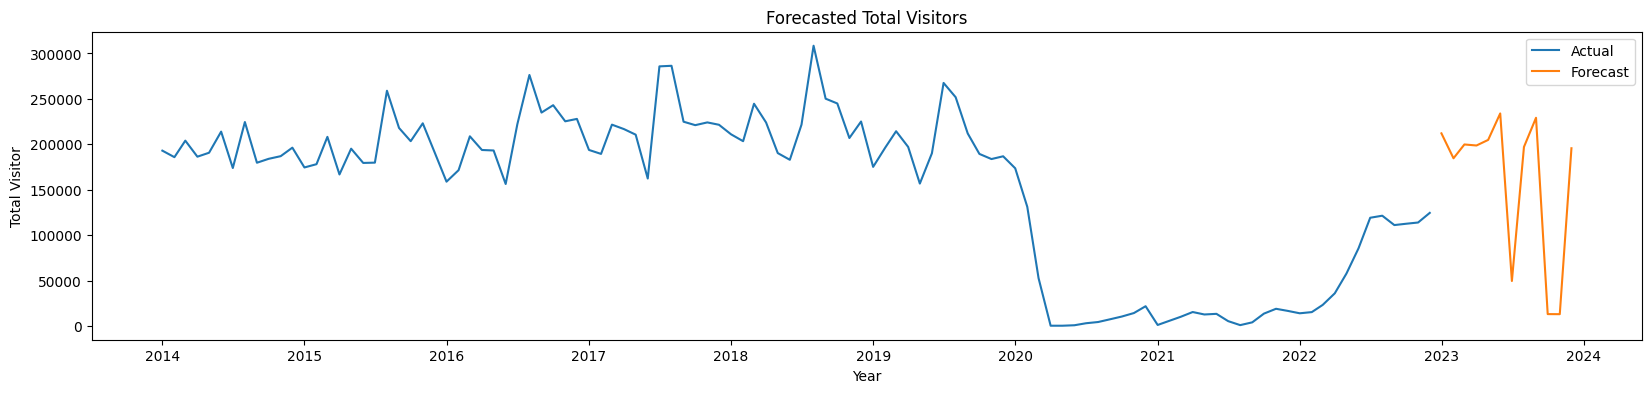

╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │        34324 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │        43183 │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │       190533 │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │        38317 │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │       197085 │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │       137257 │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │       218123 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │        71237 │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │        92630 │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │       223616 │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │       194002 │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  

In [ ]:
forecast_dates = []

for time_i in predict_period_month:
    forecast_dates.append(time_i.date())

df_forecast3 = pd.DataFrame({'Date': forecast_dates, 'Total Visitor': y_pred2})
df_forecast3['date'] = pd.to_datetime(df_forecast3['Date'])

# Assuming 'actual' contains the original data with 'datetime' and 'total_visitor' columns
plt.figure(figsize=(20,4))
actual = jkt_original[['datetime', 'total_visitor']]
actual['datetime'] = pd.to_datetime(actual['datetime'])
actual = actual.loc[actual['datetime'] >= '2014-01-01']

sns.lineplot(data=actual, x='datetime', y='total_visitor', label='Actual')
sns.lineplot(data=df_forecast3, x='date', y='Total Visitor', label='Forecast')

plt.xlabel('Year')
plt.ylabel('Total Visitor')
plt.title('Forecasted Total Visitors')
plt.legend()
plt.show()

# Generate the forecast dates from January 2023 to December 2023
forecast_dates_1 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')


# Create a list of forecast dates and prediction values
data = list(zip(forecast_dates_1, map(int, y_pred1)))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table = tabulate(data, headers=headers, tablefmt='fancy_grid')
# Print the table
print(table)

##Kesimpulan

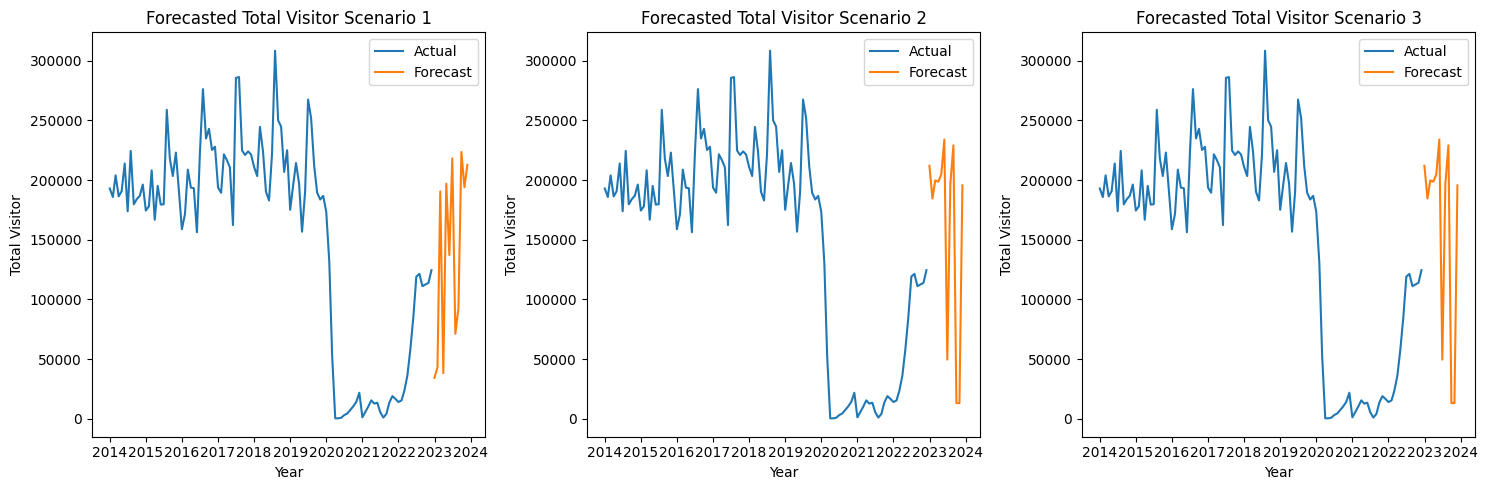

╒════════════╤═════════╤════════╤═════════════╤═════════╕
│ Skenario   │ Model   │    MAE │         MSE │    MAPE │
╞════════════╪═════════╪════════╪═════════════╪═════════╡
│ Skenario 1 │ SVR     │ 133618 │ 2.75745e+10 │ 1.00023 │
├────────────┼─────────┼────────┼─────────────┼─────────┤
│ Skenario 2 │ SVR     │ 161667 │ 3.30678e+10 │ 1.00002 │
├────────────┼─────────┼────────┼─────────────┼─────────┤
│ Skenario 3 │ SVR     │ 201831 │ 4.30206e+10 │ 1       │
╘════════════╧═════════╧════════╧═════════════╧═════════╛


In [ ]:
plt.figure(figsize=(15, 5))

# Skenario 1
plt.subplot(1, 3, 1)
sns.lineplot(data=actual, x='datetime', y='total_visitor', label='Actual')
sns.lineplot(data=df_forecast, x='date', y='total_visitor', label='Forecast')
plt.xlabel('Year')
plt.ylabel('Total Visitor')
plt.title('Forecasted Total Visitor Scenario 1')
plt.legend()

# Skenario 2
plt.subplot(1, 3, 2)
sns.lineplot(data=actual, x='datetime', y='total_visitor', label='Actual')
sns.lineplot(data=df_forecast2, x='date', y='Total Visitor', label='Forecast')
plt.xlabel('Year')
plt.ylabel('Total Visitor')
plt.title('Forecasted Total Visitor Scenario 2')
plt.legend()

# Skenario 3
plt.subplot(1, 3, 3)
sns.lineplot(data=actual, x='datetime', y='total_visitor', label='Actual')
sns.lineplot(data=df_forecast3, x='date', y='Total Visitor', label='Forecast')
plt.xlabel('Year')
plt.ylabel('Total Visitor')
plt.title('Forecasted Total Visitor Scenario 3')
plt.legend()

plt.tight_layout()
plt.show()

# Define the data for each scenario
skenario_data = [
    {
        'Skenario': 'Skenario 1',
        'Model': 'SVR',
        'MAE' : mae1,
        'MSE': mse1,
        'MAPE': mape1
    },
    {
        'Skenario': 'Skenario 2',
        'Model': 'SVR',
        'MAE' : mae2,
        'MSE': mse2,
        'MAPE': mape2
    },
    {
        'Skenario': 'Skenario 3',
        'Model': 'SVR',
        'MAE' : mae3,
        'MSE': mse3,
        'MAPE': mape3
    }
]

# Create a DataFrame from the scenario data
df = pd.DataFrame(skenario_data)

# Convert DataFrame to a list of rows
rows = df.values.tolist()

# Create a list of headers
headers = df.columns.tolist()

# Generate the table
tabel_rekap = tabulate(rows, headers=headers, tablefmt='fancy_grid')

# Print the table
print(tabel_rekap)

